# Data and Setup San Diego Water Quality 2011-2019


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline() #allows cufflinks to work offline
init_notebook_mode(connected=True) #connects notebook to something

In [2]:
sd_wq = pd.read_csv('water_quality_2011_2019_datasd.csv')

In [23]:
sd_wq.info() #338978 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sample       338978 non-null  int64         
 1   station      338978 non-null  object        
 2   depth_m      309084 non-null  float64       
 3   date_sample  338978 non-null  datetime64[ns]
 4   time         323266 non-null  object        
 5   project      338978 non-null  object        
 6   parameter    338978 non-null  object        
 7   qualifier    107545 non-null  object        
 8   value        338308 non-null  float64       
 9   units        338978 non-null  object        
 10  year         338978 non-null  int64         
 11  month        338978 non-null  int64         
 12  date         338978 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 33.6+ MB


We can see that there are 338,978 rows, and 13 columns, have to be careful about graphs, large dataset

In [3]:
sd_wq.head()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL


# Basic Questions

In [50]:
print('There are {} parameters which are {}'.format(sd_wq['parameter'].nunique(),sd_wq['parameter'].unique()))
print('There are {} stations'.format(sd_wq['station'].nunique()))
print('There are {} different depths measured at'.format(sd_wq['depth_m'].nunique()))
print('There are {} sample dates'.format(sd_wq['date_sample'].nunique()))
print('There are {} projects which are {}'.format(sd_wq['project'].nunique(),sd_wq['project'].unique()))

There are 12 parameters which are ['ENTERO' 'FECAL' 'TOTAL' 'CHLOROPHYLL' 'DENSITY' 'DO' 'PH' 'SALINITY'
 'TEMP' 'XMS' 'OG' 'SUSO']
There are 105 stations
There are 16 different depths measured at
There are 1700 sample dates
There are 2 projects which are ['SBOO' 'PLOO']


There are 12 different parameters that are measured, 105 different stations, 16 depths and 1700 dates sampled

In [38]:
print('The largest water quality reading was found at \n{}'.format(
    sd_wq.iloc[sd_wq['value'].argmax()]))

The largest water quality reading was found 
sample                  1506161862
station                         S0
depth_m                        NaN
date_sample    2015-06-16 00:00:00
time                  11:10:00 PST
project                       SBOO
parameter                    TOTAL
qualifier                        e
value                       180000
units                   CFU/100 mL
year                          2015
month                            6
date                    2015-06-16
Name: 173899, dtype: object


In [49]:
print('The highest temperature reading was found at \n{}'.format
      (sd_wq[sd_wq['parameter']=='TEMP'].iloc[
        sd_wq[sd_wq['parameter']=='TEMP']['value'].argmax()]
      )
     )

The highest temperature reading was found at 
sample                  1808065363
station                         A6
depth_m                          1
date_sample    2018-08-06 00:00:00
time                   8:09:00 PST
project                       PLOO
parameter                     TEMP
qualifier                      NaN
value                        25.54
units                            C
year                          2018
month                            8
date                    2018-08-06
Name: 289313, dtype: object


# Creating new features

In [51]:
sd_wq['date_sample']=pd.to_datetime(sd_wq['date_sample'])

Creating new columns with year month and date

In [63]:
sd_wq['year'] = sd_wq['date_sample'].apply(lambda x:x.year)
sd_wq['month'] = sd_wq['date_sample'].apply(lambda x:x.month)
sd_wq['date'] = sd_wq['date_sample'].apply(lambda x:x.date())

In [64]:
sd_wq.head()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,year,month,date
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL,2011,1,2011-01-01
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL,2011,1,2011-01-01
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL,2011,1,2011-01-01
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL,2011,1,2011-01-01
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL,2011,1,2011-01-01


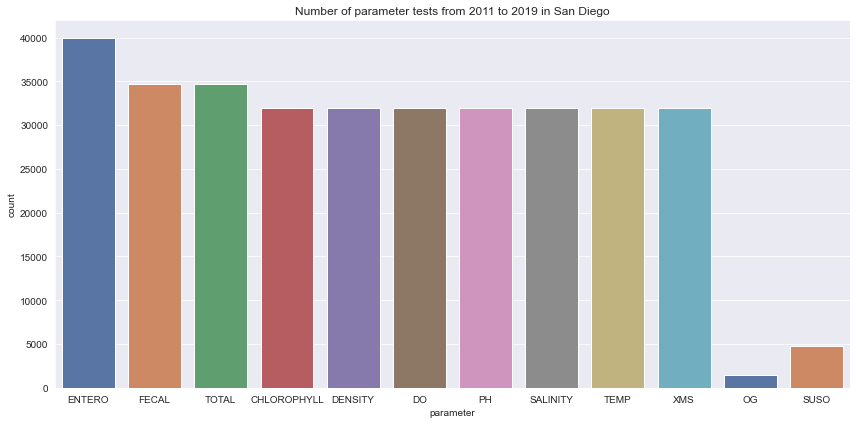

In [70]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.countplot(x='parameter',data=sd_wq,palette = 'deep')
plt.title('Number of parameter tests from 2011 to 2019 in San Diego')
plt.tight_layout()

In [62]:
sd_wq.info() #Want to see what type our dates are (year, month, date) - We want datetime objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sample       338978 non-null  int64         
 1   station      338978 non-null  object        
 2   depth_m      309084 non-null  float64       
 3   date_sample  338978 non-null  datetime64[ns]
 4   time         323266 non-null  object        
 5   project      338978 non-null  object        
 6   parameter    338978 non-null  object        
 7   qualifier    107545 non-null  object        
 8   value        338308 non-null  float64       
 9   units        338978 non-null  object        
 10  year         338978 non-null  int64         
 11  month        338978 non-null  int64         
 12  date         338978 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 33.6+ MB


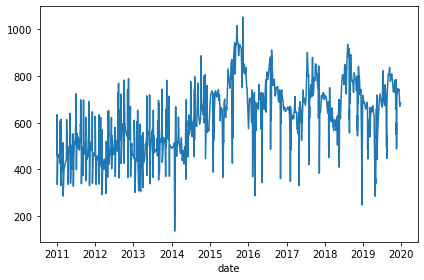

In [22]:
sd_wq[sd_wq['parameter']=='TEMP'].groupby('date').sum()['value'].plot()
plt.tight_layout()

In [92]:
sd_wq.groupby('parameter').mean()

,sample,depth_m,value,year,month
parameter,,,,,
CHLOROPHYLL,1.421044e+09,14.197681,2.769010,2014.867095,6.503040
DENSITY,1.421044e+09,14.197681,24.712218,2014.867095,6.503040
DO,1.421044e+09,14.197681,7.227980,2014.867095,6.503040
ENTERO,1.423312e+09,14.080214,85.635709,2014.963605,6.483467
FECAL,1.421690e+09,8.552792,105.061069,2014.952279,6.482339
OG,1.157372e+09,2.000000,0.372596,2013.091892,6.500000
PH,1.421044e+09,14.197681,8.093799,2014.867095,6.503040
SALINITY,1.421044e+09,14.197681,33.496282,2014.867095,6.503040
SUSO,1.153459e+09,11.323255,3.802852,2013.064195,6.468627


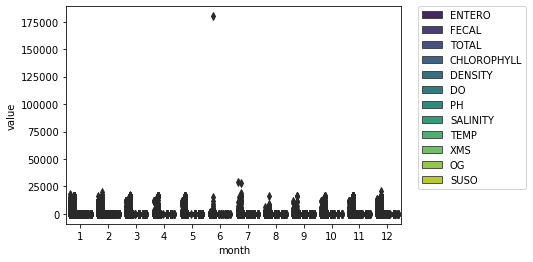

In [82]:
sns.boxplot(x='month',y='value',data=sd_wq,hue='parameter',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [72]:
sd_wq.info()
sd_wq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sample       338978 non-null  int64         
 1   station      338978 non-null  object        
 2   depth_m      309084 non-null  float64       
 3   date_sample  338978 non-null  datetime64[ns]
 4   time         323266 non-null  object        
 5   project      338978 non-null  object        
 6   parameter    338978 non-null  object        
 7   qualifier    107545 non-null  object        
 8   value        338308 non-null  float64       
 9   units        338978 non-null  object        
 10  year         338978 non-null  int64         
 11  month        338978 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 31.0+ MB


,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,year,month
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL,2011,1
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL,2011,1
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL,2011,1
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL,2011,1
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL,2011,1


In [66]:
sd_wq.groupby('parameter')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
CHLOROPHYLL,31884.0,2.769010,4.325919,0.000,0.8200,1.470,2.950,74.640
DENSITY,31895.0,24.712218,0.663629,22.328,24.3295,24.754,25.150,27.066
DO,31886.0,7.227980,1.457982,0.250,6.5100,7.570,8.140,14.470
ENTERO,39839.0,85.635709,851.322689,2.000,2.0000,2.000,2.000,29000.000
FECAL,34584.0,105.061069,924.945968,1.000,2.0000,2.000,2.000,15000.000
OG,1479.0,0.372596,0.924049,0.000,0.2000,0.200,0.200,22.600
PH,31792.0,8.093799,0.142881,7.550,8.0200,8.120,8.180,8.700
SALINITY,31810.0,33.496282,0.144502,32.095,33.3940,33.503,33.589,34.274
SUSO,4828.0,3.802852,3.406792,0.200,1.9800,3.240,4.900,49.000


<AxesSubplot:xlabel='year', ylabel='value'>

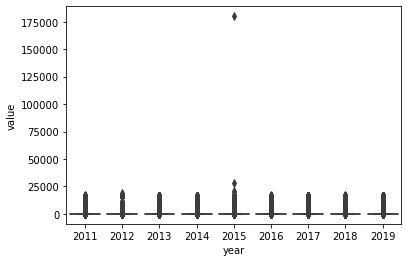

In [103]:
sns.boxplot(x='year',y='value',data=sd_wq[sd_wq['parameter']=='TOTAL'])
#plt.xlim(-100,100)

In [42]:
print(sd_wq.loc[                               #uSING .loc for location 
    sd_wq[sd_wq['parameter']=='TOTAL']['value'].idxmax()] # Location of highgest total FECAL +Coliform reading
      [['date_sample','station']] #pulling date and station of that reading
     ) 

sd_wq.loc[sd_wq[sd_wq['parameter']=='PH']['value'].idxmax()]

date_sample    2015-06-16
station                S0
Name: 173899, dtype: object


sample         1208135223
station               I27
depth_m                18
date_sample    2012-08-13
time                  NaN
project              SBOO
parameter              PH
qualifier             NaN
value                 8.7
units                  pH
Name: 67103, dtype: object

In [47]:
sd_wq.iplot(kind='scatter',x='date_sample',y='values',mode = 'markers')

KeyError: 'values'

C:\Users\rock0\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


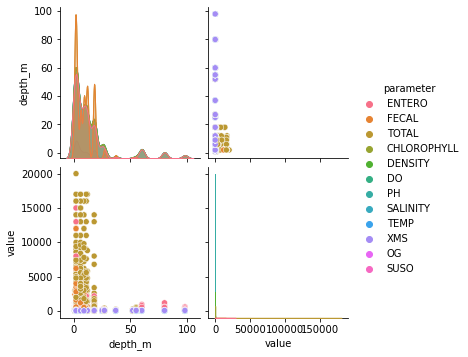

In [12]:
sns.pairplot(sd_wq[['depth_m','date_sample','parameter','value']],hue='parameter')

In [22]:
sd_wq[['depth_m','date_sample','parameter','value']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   depth_m      309084 non-null  float64
 1   date_sample  338978 non-null  object 
 2   parameter    338978 non-null  object 
 3   value        338308 non-null  float64
dtypes: float64(2), object(2)
memory usage: 10.3+ MB


In [19]:
sd_wq.corr()

,sample,depth_m,value
sample,1.000000,-0.017187,0.012007
depth_m,-0.017187,1.000000,-0.011386
value,0.012007,-0.011386,1.000000


In [26]:
print(sd_wq['parameter'].unique())
print(sd_wq['parameter'].nunique())

['ENTERO' 'FECAL' 'TOTAL' 'CHLOROPHYLL' 'DENSITY' 'DO' 'PH' 'SALINITY'
 'TEMP' 'XMS' 'OG' 'SUSO']
12


<AxesSubplot:xlabel='parameter', ylabel='value'>

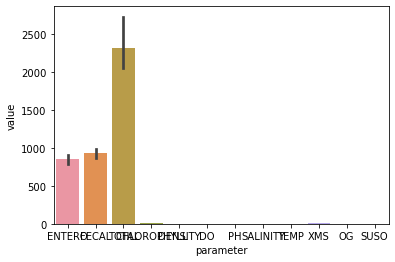

In [15]:
sns.barplot(x='parameter',y='value',data=sd_wq,estimator=np.std)

<AxesSubplot:xlabel='parameter', ylabel='value'>

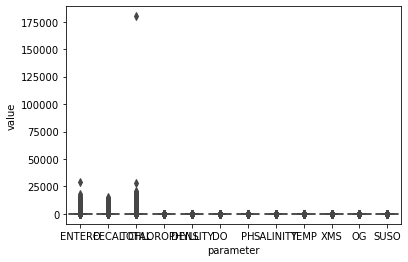

In [16]:
sns.boxplot(x='parameter',y='value',data=sd_wq)

<AxesSubplot:xlabel='date_sample', ylabel='value'>

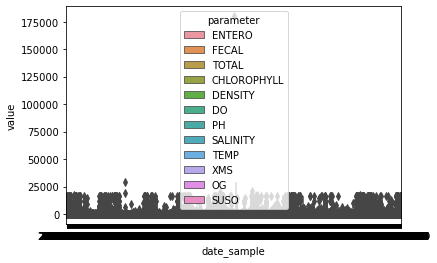

In [18]:
sns.boxplot(x='date_sample',y='value',data=sd_wq, hue='parameter')

In [3]:
sd_wq.head()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL


In [4]:
sd_wq.tail()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
338973,1912308431,S8,NaN,2019-12-30,7:55:00 PST,SBOO,FECAL,<,2.0,CFU/100 mL
338974,1912308431,S8,NaN,2019-12-30,7:55:00 PST,SBOO,TOTAL,<,20.0,CFU/100 mL
338975,1912308430,S9,NaN,2019-12-30,7:32:00 PST,SBOO,ENTERO,<,2.0,CFU/100 mL
338976,1912308430,S9,NaN,2019-12-30,7:32:00 PST,SBOO,FECAL,<,2.0,CFU/100 mL
338977,1912308430,S9,NaN,2019-12-30,7:32:00 PST,SBOO,TOTAL,e,20.0,CFU/100 mL


In [5]:
sd_wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample       338978 non-null  int64  
 1   station      338978 non-null  object 
 2   depth_m      309084 non-null  float64
 3   date_sample  338978 non-null  object 
 4   time         323266 non-null  object 
 5   project      338978 non-null  object 
 6   parameter    338978 non-null  object 
 7   qualifier    107545 non-null  object 
 8   value        338308 non-null  float64
 9   units        338978 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.9+ MB


In [6]:
sd_wq_dic = pd.read_csv('water_quality_dictionary_datasd.csv')

In [7]:
sd_wq_dic.head()

,field,description,possible_values
0,sample,Unique sample ID,NaN
1,station,Unique location ID where sample was collected....,NaN
2,depth_m,Depth in meters,NaN
3,date_sample,Date sample was collected,NaN
4,time,Time sample was collected,NaN


In [8]:
sd_wq_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   field            10 non-null     object
 1   description      10 non-null     object
 2   possible_values  4 non-null      object
dtypes: object(3)
memory usage: 368.0+ bytes


In [9]:
#What were the highest values for each parameter

sd_wq['value']

0          24.0
1         110.0
2         100.0
3          94.0
4         400.0
          ...  
338973      2.0
338974     20.0
338975      2.0
338976      2.0
338977     20.0
Name: value, Length: 338978, dtype: float64

In [19]:
#sd_wq[sd_wq['sample'] == sd_wq.groupby('parameter').max('value')['sample']]

In [ ]:
sd_wq.groupby('parameter').describe(include = ['value'])

In [16]:
plt.figure(figsize=(15, 7))

sns.color_palette("mako", as_cmap=True)

<Figure size 1080x504 with 0 Axes>

In [26]:
sd_wq_fecal = sd_wq[sd_wq['parameter'] == 'FECAL']

In [27]:
sd_wq_fecal

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
6,101111760,S10,NaN,2011-01-01,12:09:00 PST,SBOO,FECAL,>,12000.0,CFU/100 mL
10,101111762,S4,NaN,2011-01-01,11:48:00 PST,SBOO,FECAL,NaN,400.0,CFU/100 mL
14,103111890,D10,NaN,2011-01-03,9:26:00 PST,PLOO,FECAL,e,32.0,CFU/100 mL
17,103111891,D11,NaN,2011-01-03,9:15:00 PST,PLOO,FECAL,e,8.0,CFU/100 mL
20,103111892,D12,NaN,2011-01-03,8:43:00 PST,PLOO,FECAL,e,6.0,CFU/100 mL
...,...,...,...,...,...,...,...,...,...,...
338964,1912308436,S4,NaN,2019-12-30,10:43:00 PST,SBOO,FECAL,NaN,68.0,CFU/100 mL
338967,1912308433,S5,NaN,2019-12-30,8:43:00 PST,SBOO,FECAL,NaN,1200.0,CFU/100 mL
338970,1912308435,S6,NaN,2019-12-30,9:25:00 PST,SBOO,FECAL,e,60.0,CFU/100 mL
338973,1912308431,S8,NaN,2019-12-30,7:55:00 PST,SBOO,FECAL,<,2.0,CFU/100 mL


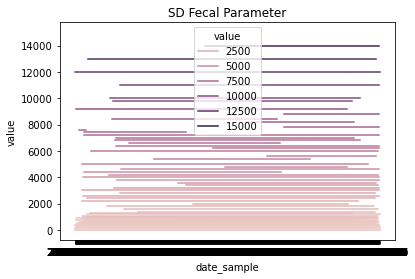

In [28]:
sd_wq_chart = sns.lineplot(
    x="date_sample",
    y="value",
    hue='value',
    data=sd_wq_fecal
).set_title('SD Fecal Parameter')
plt.show()

In [ ]:
print('hello')